<h1>CS4619: Artificial Intelligence 2</h1>
<h2>Introduction</h2>
<h3>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h3>

# Initialization $\newcommand{\Set}[1]{\{#1\}}$ $\newcommand{\Tuple}[1]{\langle#1\rangle}$ $\newcommand{\v}[1]{\pmb{#1}}$ $\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ $\newcommand{\rv}[1]{[#1]}$

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

<h1>About this Module</h1>
<table>
    <tr>
        <th>Lecturer:</th>
        <td>Derek Bridge, Room G-61, Western Gateway Building<br />
            d stop bridge amphora cs plip ucc plop ie<br />
            <a href="http://www.cs.ucc.ie/dbridge.html">www.cs.ucc.ie/dbridge.html</a>
        </td>
    </tr>
    <tr>
        <th>Credit weighting:</th>
        <td>5 credit <em>optional</em> module</td>
    </tr>
    <tr>
        <th>Prerequisites:</th>
        <td>Precision of thought<br />
            We will use: matrices, vectors, calculus, probabilities, Python
        </td>
    </tr>
    <tr>
        <th>Course web site:</th>
        <td><a href="http://www.cs.ucc.ie/~dgb/courses/ai2.html">www.cs.ucc.ie/~dgb/courses/ai2.html</a></td>
    <tr>
</table>

<h1>About this Module</h1>
<table>
    <tr>
        <th>Lectures:</th>
        <td>2 &times; 1 hr per week</td>
    </tr>
    <tr>
        <th>Labs:</th>
        <td>1 &times; 2 hr per week</td>
    </tr>
    <tr>
        <th>Private study:</th>
        <td>At least 2 hrs per week</td>
    </tr>
</table>

<h1>About this Module</h1>
<table>
    <tr>
        <th>Examination:</th>
        <td>1.5 hr written exam (80% of the marks)</td>
    </tr>
    <tr>
        <th>Continuous assessment:</th>
        <td>Intensive programming assignment (20% of the marks)</td>
    </tr>
    <tr>
        <th>How to fail:</th>
        <td>Skip lectures &amp; labs; avoid private study; cram at Easter; expect the exam to be a memory test</td>
    </tr>
    <tr>
        <th>How to pass:</th>
        <td>Attend lectures &amp; labs; summarize the notes; tackle the lab activities properly; expect a problem-solving exam</td>
    </tr>
</table>

<h1>Plagiarism</h1>
<ol>
    <li>
        Plagiarism is presenting someone else’s work as your own. It is a violation of UCC Policy and there are 
        strict and severe penalties.
    </li>
    <li>
        You must read and comply with the UCC Policy on Plagiarism <a href="http://www.ucc.ie/en/exams/procedures-regulations/">www.ucc.ie/en/exams/procedures-regulations/</a>
    </li>
    <li>
        The Policy applies to all work submitted, including software.
    </li>
    <li>
        You can expect that your work will be checked for evidence of plagiarism or collusion.
    </li>
    <li>
        In some circumstances it may be acceptable to reuse a small amount of work by others, but only if you 
        provide explicit acknowledgement and justification.
    </li>
    <li>
        If in doubt ask your module lecturer prior to submission. Better safe than sorry!
    </li>
</ol>

<h1>Prediction</h1>
<p>
    We want to create programs that make <b>predictions</b>. Generically, we will refer to such programs as <b>estimators</b>.
</p>

<p>
    There are two main types of prediction, and hence two types of estimator:
</p>

<figure>
    <img src="files/img-prediction.png" 
         alt="The two main types of estimation are regression and classification" />
</figure>
<ul>
    <li>
        <b>Regression</b> means predicting a continuous value
    </li>
    <li>
        <b>Classification</b> means predicting a discrete value
    </li>
</ul>

<h1>Regression</h1>
<ul>
    <li>An example of regression is predicting the market value of your house.</li>
    <li>
        <b>Features</b>:
        <ul>
            <li>
                Features describe the houses, e.g.
                <ul>
                    <li>
                        $\mathit{flarea}$: the total floor area (in square metres)
                    </li>
                    <li>
                        $\mathit{bdrms}$: the number of bedrooms
                    </li>
                    <li> 
                        $\mathit{bthrms}$: the number of bathrooms
                    </li>
                </ul>
            </li>
            <li>
                A particular house has <b>values</b> for the features
                <ul>
                    <li>
                        e.g. your house: $\mathit{flarea} = 114, \mathit{bdrms} = 3, \mathit{bthrms} = 2$
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>
        The <b>dependent variable</b> (usually designated $y$):
        <ul>
            <li>
                the value we are predicting (the 'outcome', the 'target')
                <ul>
                    <li>
                        e.g. the predicted selling price of a house
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<h2>Building a model: ask an expert</h2>
<p>
    So how do we predict the price of your house? 
</p>
<p>
    We ask Ann. She's an auctioneer &mdash; an expert at predicting Cork city house prices.
</p>
<p>
    But we don't ask her to predict your house price. We ask her for a <em>general</em> method for predicting Cork
    house prices.
</p>
<p>
    She tells us that her rule-of-thumb is that prices start at 25k&euro; and increase by 1.5k&euro; for every 
    extra square metre of floor area:
    $$y = 25 + 1.5\mathit{flarea}$$
</p>
<p>
    So, she predicts your house will sell for $y = 25 + 1.5 \times 114 = 196$k&euro;.
</p>

<h3>Models</h3>
<p>
    Ann has given us a <b>model</b>.
</p>
<ul>
    <li>
        In very abstract terms, a model is an approximation of some part of reality that enables us to make 
        predictions about that reality.
    </li>
    <li>
        In very concrete terms, a model is a formula that expresses the relationship between the dependent
        variable (the thing being predicted) and the features.
    </li>
</ul>
<p>
    Ann's is a <b>linear model</b>: it takes the form of the equation of a straight line. 
</p>

### Ann's Model

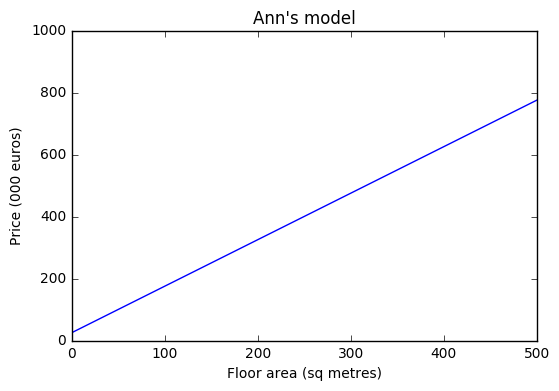

In [15]:
def f_ann(flarea):
    return 25 + 1.5 * flarea

fig = plt.figure()
plt.title("Ann's model")
plt.xlabel("Floor area (sq metres)")
plt.xlim(0, 500)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1000)
xvals = np.linspace(0, 500, 2)
plt.plot(xvals, f_ann(xvals))
plt.show()

### Ben's Model

<p>
    We might also ask Ben, another Cork auctioneer, and he might give us a different model, e.g. 
    $$y = 60\mathit{bdrms} + 80\mathit{bthrms}$$
</p>
<p>
    Ben's model is also linear, so we can plot it:
</p>

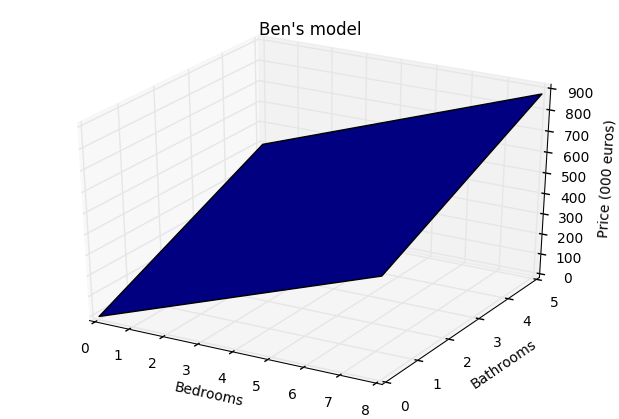

In [16]:
def f_ben(bdrms, bthrms):
    return 60 * bdrms + 80 * bthrms

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Ben's model")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Bathrooms")
ax.set_zlabel("Price (000 euros)")
xvals = np.linspace(0, 8, 2)
yvals = np.linspace(0, 5, 2)
xxvals, yyvals = np.meshgrid(xvals, yvals)
ax.plot_surface(xxvals, yyvals, f_ben(xxvals, yyvals))
plt.show()

<h3>Which Model is Better?</h3>
<ul>
    <li>
        Ann's and Ben's models make different predictions.
        <ul>
            <li>
                Ann predicts your house will sell for $y = 25 + 1.5 \times 114 = 196$k&euro;.
            </li>
            <li>
                Ben predicts your house will sell for $y = 60 \times 3 + 80 \times 2 = 340$k&euro;.
            </li>
        </ul>
    </li>
    <li>
        So we might ask: which is better?
        <ul>
            <li>
                A complicated question &mdash; to be explored in this module.
            </li>
            <li>
                For now, suppose your house sells for 210000&euro;. Ann's prediction (196000&euro;) is closer 
                than Ben's (340000&euro;), so we have some evidence that Ann's model is better.
            </li>
        </ul>
    </li>
</ul>

<h2>Building a model: learn from data</h2>
<p>
    Rather than ask an expert, we want to <b>learn</b> a model from data.
</p>
<p>
    Suppose we collect a set of <b>examples</b>.
</p>
<ul>
    <li>
        Each example describes a house by giving values for the various features (e.g. floor area, number of bedrooms and 
        number of bathrooms). 
    </li>
    <li>
        But each example also gives the <em>actual</em> selling price of the house.
    </li>
</ul>
<p>
    We take some or all of these examples, call them the <b>training set</b>, and give them to the learning 
    algorithm. As best it can, it finds a model based on the examples in the training set.
</p>

<h3>Learn from data</h3>
<figure>
    <img src="files/img-learning.png" alt="A learning algorithm chooses a hypothesis from a set of hypotheses,
        based on a set of training examples, in the hope of approximating an unkown target function" />
</figure>

<h3>Terminology</h3>
<ul>
    <li>
        We will say that the algorithm <b>learns</b> a model.
    </li>
    <li>
        We could also say that we are <b>training</b> the algorithm on the data.
    <li>
        We could also say that the algorithm <b>fits</b> a model to the training set.
    </li>
    <li>
        We could also call it <b>function approximation</b>.
    </li>
    <li>
        We call this <b>supervised learning</b> because the examples include the actual outcomes (in this case, the actual
        selling prices). In <b>unsupervised learning</b>, the examples provide only the feature values.
    </li>
</ul>

<h3>Cork Property Prices Dataset</h3>
<p>
    At the beginning of November 2014, I scraped a dataset of property prices for Cork city from www.daft.ie.
    They are in a CSV file. Each line in the file is an example, representing the sale of one house. 
</p>
<ul>
    <li>
        Each line contains the feature-values (floor area, number of bedrooms, number of
        bathrooms).
    </li>
    <li>
        The last value on each line is the <em>actual</em> selling price. (In fact, it's the <em>asking</em> price, but we'll pretend that it's the selling price.)
    </li>
</ul>
<p>
    Without going into any details, we'll learn a model from this data, using all of it as the training set.
</p>
<p>
    (N.B. We will see later that using <em>all</em> the data for training is not necessarily the right thing to do.)
</p>

### Using scikit-learn to Build a Model for the Cork Property Prices Dataset

In [17]:
# Use pandas to read the CSV file
df = pd.read_csv("dataset-corkA.csv")

# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['flarea', 'bdrms', 'bthrms']].values
y = df['price'].values

# Create linear regression object
estimator = LinearRegression()

# Train the model using the data
estimator.fit(X, y)

# Print the parameters that it learns
print('Intercept: ', estimator.intercept_)
print('Coefficients: ', estimator.coef_)

Intercept:  62.5026190928
Coefficients:  [  4.6900952  -72.28169508 -57.05464555]


<h3>Using the model to make a prediction</h3>
<p>
    We have learned a linear model, like Ann's and Ben's. Specifically, the model is roughly
    $$y = 62.50 + 4.69\mathit{flarea} - 72.28\mathit{bdrms} - 57.05\mathit{bthrms}$$
    What does this model predict that your house will sell for?
</p>

In [18]:
estimator.predict([[114, 3, 2]])

array([ 266.21909577])

<p>
    It predicts your house will sell for $y = 62.50 + 4.69 \times 114 - 72.28 \times 3 - 57.05 \times
    2 = 266$k&euro;.
</p>
<p>
    It's a linear model. But, unfortunately, we can't plot it. Why?
</p>
<p>
    So, let's learn a model like Ann's: using just the floor area.
</p>

### Building Another Model

In [19]:
# This time only use the floor area
X = df[['flarea']].values

# Re-train the model using the smaller dataset
estimator.fit(X, y)

# Print the parameters that it learns
print('Intercept: ', estimator.intercept_)
print('Coefficients: ', estimator.coef_)

Intercept:  -137.189735023
Coefficients:  [ 3.38381748]


<h3>Visualizing the trainning set and the model</h3>
<p>
    We can show the training examples and the model on the same plot:
</p>

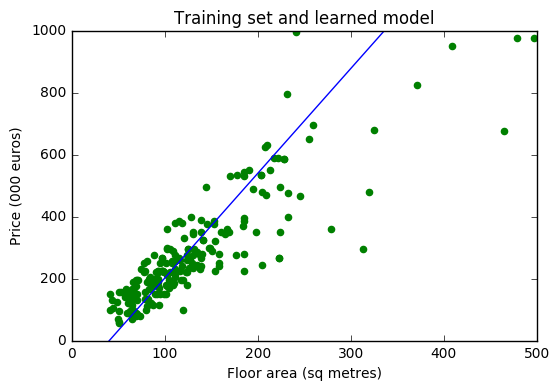

In [20]:
def f_learned(flarea):
    return -137.19 + 3.38 * flarea

fig = plt.figure()
plt.title("Training set and learned model")
plt.xlabel("Floor area (sq metres)")
plt.xlim(0, 500)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1000)
xvals = np.linspace(0, 500, 2)
plt.plot(xvals, f_learned(xvals), color = 'blue')
plt.scatter(X, y, color = 'green')
plt.show()

<h1>Classification</h1>
<p>
    In classification, we are given an object and we predict to which of a finite (and usually small) set of
    classes the object belongs. So we formulate it as follows:
</p>
<ul>
    <li>
        We assume we have a finite set of <b>labels</b>, $\cal{C}$.
    </li>
    <li>
        Given an object, our task is to assign one of the labels $y \in \cal{C}$ to the object.
    </li>
</ul>

<h2>Classification: Example</h2>
<p>
    An example of classification is predicting whether a student will fail or pass his/her programming module. 
    Features and their values describe the students, e.g. Craig's lecture attendance, $\mathit{lect}$, is 60%, 
    his lab attendance, $\mathit{lab}$, is 45%, and his leaving certificate points, $\mathit{cao}$, are 500. 
    We want a method to predict label $y \in \Set{\mathit{fail},\mathit{pass}}$. 
</p>
<p>
    Again, we could ask an expert for a model, e.g. Derek's model might make predictions as follows:
    $$y = \left\{\begin{array}{rl}
                     \mathit{fail} & \mbox{if } \mathit{lect} \leq 80 \land \mathit{lab} \leq 80 \\
                     \mathit{pass} & \mbox{otherwise}
                 \end{array}
          \right.$$
</p>
<p>
    But in this module, again, we are more interested to learn the model from data.
</p>

<h2>Building a Classifier from Data</h2>
<p>
    I have collected a dataset of student performances in a programming module. Without going into any details,
    we'll learn a model from this data, using all of it as the training set.
</p>

In [21]:
# Read CSV file
df = pd.read_csv("dataset-cs1109.csv")

# Get the feature-values into a separate numpy arrays of numbers and the target values into a separate 
# numpy arrays of ints
X = df[['lect', 'lab', 'cao']].values
y = df['outcome'].values

# Create logistic regression object
estimator = LogisticRegression()

# Train the model using the data
estimator.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>Using the model</h2>
<p> 
    And let's see what it predicts for Craig, where a prediction of 0 means $\mathit{fail}$ and 1 means 
    $\mathit{pass}$:
</p>

In [22]:
estimator.predict([[60, 45, 500]])

array([0])

<p>
    He fails!
</p>